# Machine Learning on Text: Clustering Assignment

In [1]:
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

### Ingest the company_profiles data set into a corpus.

In [4]:
path = '/content/drive/MyDrive/python_for_data_scientists/DSI07/DataSets/company_profiles'
DOC_PATTERN = r'.*\.txt'
corpus = PlaintextCorpusReader(path, DOC_PATTERN)
corpus.fileids()

['A-profile.txt',
 'AA-profile.txt',
 'AAC-profile.txt',
 'AAL-profile.txt',
 'AAMC-profile.txt',
 'AAME-profile.txt',
 'AAN-profile.txt',
 'AAOI-profile.txt',
 'AAON-profile.txt',
 'AAP-profile.txt',
 'AAPL-profile.txt',
 'AAT-profile.txt',
 'AAWW-profile.txt',
 'AB-profile.txt',
 'ABAX-profile.txt',
 'ABBV-profile.txt',
 'ABCB-profile.txt',
 'ABCD-profile.txt',
 'ABDC-profile.txt',
 'ABEO-profile.txt',
 'ABG-profile.txt',
 'ABIO-profile.txt',
 'ABM-profile.txt',
 'ABMD-profile.txt',
 'ABR-profile.txt',
 'ABT-profile.txt',
 'ABTX-profile.txt',
 'ACAD-profile.txt',
 'ACC-profile.txt',
 'ACCO-profile.txt',
 'ACET-profile.txt',
 'ACFC-profile.txt',
 'ACFN-profile.txt',
 'ACHC-profile.txt',
 'ACHN-profile.txt',
 'ACIA-profile.txt',
 'ACIW-profile.txt',
 'ACLS-profile.txt',
 'ACM-profile.txt',
 'ACNB-profile.txt',
 'ACOR-profile.txt',
 'ACRE-profile.txt',
 'ACRS-profile.txt',
 'ACRX-profile.txt',
 'ACTA-profile.txt',
 'ACTG-profile.txt',
 'ACU-profile.txt',
 'ACUR-profile.txt',
 'ACXM-prof

### Create a list of documents by extracting the raw text for each fileid in the corpus.

In [5]:
docs = [corpus.raw(fileid) for fileid in corpus.fileids()]
docs[0]

"Agilent Technologies, Inc. provides application focused solutions to the life sciences, diagnostics, and applied chemical markets worldwide. It operates in three segments: Life Sciences and Applied Markets, Diagnostics and Genomics, and Agilent CrossLab. The Life Sciences and Applied Markets segment offers liquid chromatography systems and components; liquid chromatography mass spectrometry systems; gas chromatography systems and components; gas chromatography mass spectrometry systems; inductively coupled plasma mass spectrometry instruments; atomic absorption instruments; microwave plasma-atomic emission spectrometry instruments; inductively coupled plasma optical emission spectrometry instruments; raman spectroscopy; microfluidics based automated electrophoresis products; cell analysis plate based assays; laboratory software and informatics systems; laboratory automation; dissolution testing; vacuum pumps; and measurement technologies. The Diagnostics and Genomics segment provides 

### Preprocess the documents, including the steps below.

- Word tokenize the document.
- Lowercase all tokens.
- Lemmatize and stem the tokens.
- Remove stop words and punctuation.

In [6]:
def preprocess(docs):
    lemmatizer = WordNetLemmatizer()
    stemmer = SnowballStemmer('english')
    preprocessed = []

    for doc in docs:
        tokenized = word_tokenize(doc)
        cleaned = [stemmer.stem(lemmatizer.lemmatize(token.lower())) 
                   for token in tokenized 
                   if token.lower() not in stopwords.words('english')
                  if token.isalpha()]
        untokenized = " ".join(cleaned)
        preprocessed.append(untokenized)
    
    return preprocessed

In [7]:
preprocessed = preprocess(docs)
preprocessed[0]

'agil technolog provid applic focus solut life scienc diagnost appli chemic market worldwid oper three segment life scienc appli market diagnost genom agil crosslab life scienc appli market segment offer liquid chromatographi system compon liquid chromatographi mass spectrometri system gas chromatographi system compon gas chromatographi mass spectrometri system induct coupl plasma mass spectrometri instrument atom absorpt instrument microwav emiss spectrometri instrument induct coupl plasma optic emiss spectrometri instrument raman spectroscopi microfluid base autom electrophoresi product cell analysi plate base assay laboratori softwar informat system laboratori autom dissolut test vacuum pump measur technolog diagnost genom segment provid reagent instrument softwar consum array dna mutat detect genotyp gene copi number determin identif gene rearrang dna methyl profil gene express profil well sequenc target enrich servic equip focus product synthes oligonucleotid use activ pharmaceut 

### TF-IDF vectorize the preprocessed documents.

In [8]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(preprocessed)
vectors

<3380x18902 sparse matrix of type '<class 'numpy.float64'>'
	with 251453 stored elements in Compressed Sparse Row format>

### Determine the optimal number of clusters using the Yellowbrick library's KElbow Visualizer and a KMeans clustering algorithm.

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f66d2463908>,
                 k=None, metric=None, model=None, timings=True)

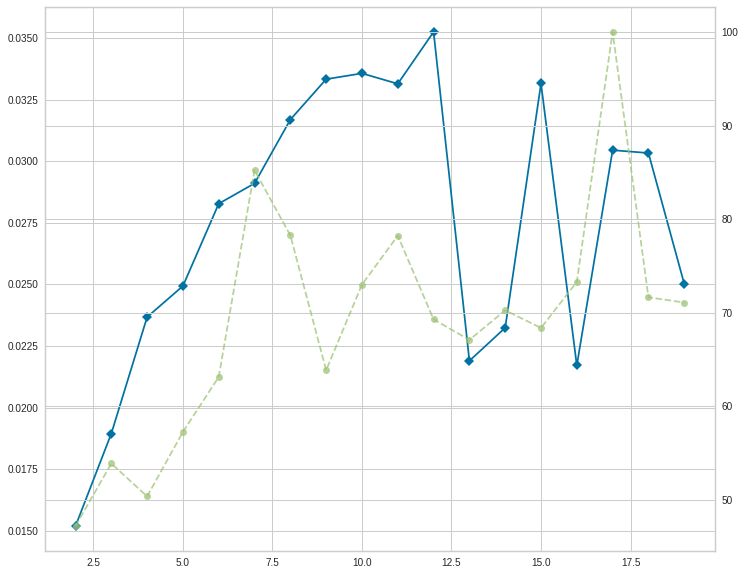

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 10

model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette')

visualizer.fit(vectors)

### Perform K-Means Clustering using the optimal number of clusters determine in the previous step.

In [10]:
kmeans = KMeans(n_clusters=10)

clusters = kmeans.fit_predict(vectors)
clusters

array([7, 9, 9, ..., 9, 0, 4], dtype=int32)

In [11]:
df = pd.DataFrame(docs, columns=['text'])
df.head()

,text
0,"Agilent Technologies, Inc. provides applicatio..."
1,"Alcoa Corporation produces and sells bauxite, ..."
2,"AAC Holdings, Inc. provides inpatient and outp..."
3,"American Airlines Group Inc., through its subs..."
4,"Altisource Asset Management Corporation, an as..."


In [12]:
df['cluster'] = clusters
df.head()

,text,cluster
0,"Agilent Technologies, Inc. provides applicatio...",7
1,"Alcoa Corporation produces and sells bauxite, ...",9
2,"AAC Holdings, Inc. provides inpatient and outp...",9
3,"American Airlines Group Inc., through its subs...",9
4,"Altisource Asset Management Corporation, an as...",1


In [13]:
df['file'] = corpus.fileids()
df.head()

,text,cluster,file
0,"Agilent Technologies, Inc. provides applicatio...",7,A-profile.txt
1,"Alcoa Corporation produces and sells bauxite, ...",9,AA-profile.txt
2,"AAC Holdings, Inc. provides inpatient and outp...",9,AAC-profile.txt
3,"American Airlines Group Inc., through its subs...",9,AAL-profile.txt
4,"Altisource Asset Management Corporation, an as...",1,AAMC-profile.txt


### Perform Agglomerative Clustering using the same number of clusters.

In [14]:
agl = AgglomerativeClustering(n_clusters=10)

clusters = agl.fit_predict(vectors.toarray())

df = pd.DataFrame(docs, columns=['text'])
df['cluster'] = clusters
df['file'] = corpus.fileids()
df.head()

,text,cluster,file
0,"Agilent Technologies, Inc. provides applicatio...",1,A-profile.txt
1,"Alcoa Corporation produces and sells bauxite, ...",8,AA-profile.txt
2,"AAC Holdings, Inc. provides inpatient and outp...",1,AAC-profile.txt
3,"American Airlines Group Inc., through its subs...",7,AAL-profile.txt
4,"Altisource Asset Management Corporation, an as...",7,AAMC-profile.txt


### Choose one of the three topic modeling approaches covered. Cluster into the optimal number of clusters and extract 5 keywords that represent the documents in each cluster.

In [15]:
vectors.shape

(3380, 18902)

In [16]:
from sklearn.decomposition import NMF

num_keywords = 5
num_topics = 8

model = NMF(n_components=num_topics)
model.fit_transform(vectors)

array([[0.        , 0.02603987, 0.00516976, ..., 0.06632635, 0.00808766,
        0.        ],
       [0.00214693, 0.00866454, 0.01403737, ..., 0.01736583, 0.00505611,
        0.02962344],
       [0.00647602, 0.04956094, 0.00594133, ..., 0.        , 0.00535327,
        0.00228347],
       ...,
       [0.00381461, 0.01208506, 0.        , ..., 0.02120409, 0.0098297 ,
        0.04038903],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.16841655],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00172148]])

In [17]:
pd.DataFrame(model.components_, columns=vectorizer.get_feature_names())

,aaa,aac,aad,aaon,aar,aaron,aastrom,aav,ab,abacus,abak,abaloparatid,abanderado,abandon,abat,abaxi,abbotsford,abbott,abboud,abbvi,abc,abcit,abdomin,abel,abeona,abercrombi,abil,abilen,abilitec,abington,abiom,abirateron,abitibi,abl,ablat,abm,abnorm,aboveground,abra,abras,...,zixarch,zixdirectori,zixencrypt,zixit,zixon,zixprotect,znbr,zodiac,zoe,zoeti,zogenix,zohydro,zolmitriptan,zomajet,zombi,zone,zonedirector,zoneplann,zoo,zorba,zosano,zoster,zowi,zseri,zulili,zume,zumiez,zuramp,zurich,zurn,zvex,zydeco,zydelig,zydi,zynerba,zynga,zyrtec,zytiga,zyvox,übermonst
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003804,0.000000,0.002109,0.000000,0.000000,0.000079,0.000194,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.001703,0.000000,0.000000,0.001252,0.000000,0.000000,0.000000,0.000000,0.001397,0.000105,0.000000,0.000000,0.003172,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.003081,0.000000,0.000000,0.000000,0.000000,0.000000,0.010903,0.000000,0.001694,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002116,0.002167,0.000000,0.000000,0.000000,...,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000221,0.001168,0.001902,0.001902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000546,0.000000,0.004580,0.000000,0.000000,0.000000,0.000000
2,0.000065,0.000000,0.000053,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008887,0.000710,0.000015,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000483,0.000000,0.000000,0.000000,0.000000,0.000476,0.000109,0.000000,0.000017,0.000000,0.001499,0.002352,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000424,0.000000,0.000424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001864,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000098
3,0.000650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000047,0.000000,0.009920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000011,0.000992,0.000000,0.000158,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000004,0.000031,0.000000,0.000000,0.000000,0.000000,0.000000,0.001465,0.000042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000398,0.002241,0.003774,0.000000,0.000000,0.000000,0.003421,0.011278,0.016234,0.000000,0.000055,0.006979,0.000000,0.000000,0.000000,0.000584,0.000000,0.010471,0.000000,0.01434,0.000000,0.000000,0.001292,0.000000,0.004612,0.000000,0.003401,0.000000,0.000000,0.000000,0.000724,0.002688,0.000133,0.000459,0.005989,0.000000,0.009390,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000778,0.014452,0.001547,0.007660,0.001095,0.000000,0.002263,0.000000,0.000000,0.000000,0

In [18]:
for index, topic in enumerate(model.components_):
    print('topic', index)
    for i in topic.argsort()[:-num_keywords - 1 : -1]:
        print(vectorizer.get_feature_names()[i], topic[i])
        
    print('__________')


topic 0
loan 2.3231712034675627
bank 1.4729786896979424
deposit 1.115064850839045
account 0.9757008918553789
commerci 0.6913447512532598
__________
topic 1
servic 1.3449369896911314
solut 0.7725660810868891
manag 0.6798992233377027
provid 0.5001256354061239
softwar 0.44014011521963714
__________
topic 2
gas 1.1860879987399129
natur 0.9087699896565395
oil 0.898684779519943
energi 0.47558586392495844
texa 0.3793354168295546
__________
topic 3
invest 1.3720553661001083
fund 0.9921155476521949
incom 0.5049555869710651
equiti 0.4920316753452924
manag 0.3820765290636629
__________
topic 4
treatment 0.7827011675576951
phase 0.7100936228141456
clinic 0.6980721897143836
trial 0.6387326529258203
develop 0.6061206325299899
__________
topic 5
system 0.7973720553155382
product 0.7770811891584195
manufactur 0.668031942783012
industri 0.621244918114961
segment 0.5907327430698307
__________
topic 6
insur 1.5200067000147917
life 0.46115390053647964
liabil 0.41397992921346427
properti 0.3986584204747648